In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
from sentence_transformers import SentenceTransformer
from nltk.tokenize import sent_tokenize
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
import seaborn as sns
import sys
from sklearn.metrics import f1_score, accuracy_score
import scipy
import os
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

/opt/homebrew/lib/python3.9/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/opt/homebrew/lib/python3.9/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: htt

In [2]:
df = pd.read_csv('df_with_topics_1210.csv')# for mo in months:
df['anthroscore_bin'] = df.anthroscore > 0

<ipython-input-2-53c287109356>:1: DtypeWarning: Columns (53,81) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('df_with_topics_1210.csv')# for mo in months:


In [10]:
# s as pd
import statsmodels.formula.api as smf

# Define a mapping for months to integers
month_mapping = {
    'may': 0, 'june': 1, 'aug': 3, 'sept': 4, 'oct': 5,
    'nov': 6, 'dec': 7, 'jan': 8, 'feb': 9,'mar':10,'apr':11,'aug2024':15
}

# months = ['may', 'june', 'aug', 'sept', 'oct', 'nov', 'dec', 'jan', 'feb','mar','apr','aug2024']

# Convert the month column to a numerical time variable
df['time'] = df['month'].map(month_mapping)



In [7]:
df['is_not_man'] = df['gender'] != 'M'
df['is_not_white'] = df['ethnicity']!='White'
# ()
df['short_topic'] = df['short_topic'].str.replace('database accessor','search engine').str.replace('creative synthesizer','synthesizer')#.value_counts()
df['short_topic'] = df['short_topic'].str.replace('machine','computer')


In [191]:

# indices = np.where(p_values > 0.05)[0]
# # p_values[p_values > 0.05].index
# indices

array([ 5, 10, 11, 12, 13, 15, 16, 18, 19, 20, 22, 23])

10552
                            OLS Regression Results                            
Dep. Variable:                  trust   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     105.9
Date:                Thu, 16 Jan 2025   Prob (F-statistic):               0.00
Time:                        14:40:07   Log-Likelihood:                -12078.
No. Observations:               10552   AIC:                         2.421e+04
Df Residuals:                   10524   BIC:                         2.441e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const 

<ipython-input-245-08d3bc143af9>:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients.values, y=new_ind, palette=colors,alpha=0.8)


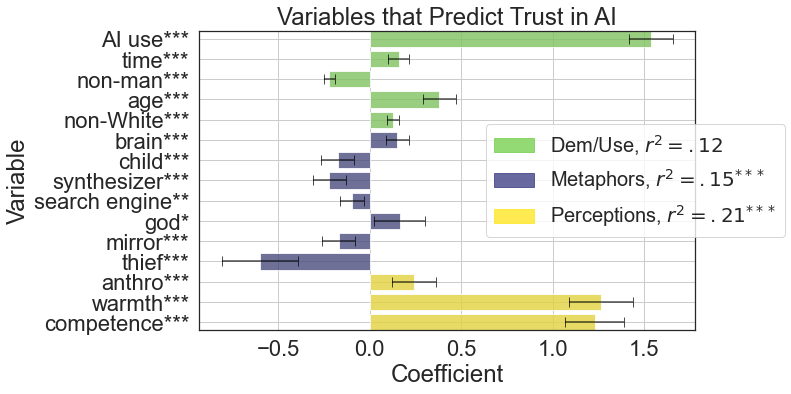

In [245]:
import seaborn as sns
from scipy.stats import sem
font = {
        'size'   : 22}

matplotlib.rc('font', **font)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set(font_scale =2)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})

from sklearn.preprocessing import StandardScaler
import pandas as pd
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'df' is your DataFrame and 'predictors' is a list of columns to standardize
scaler = MinMaxScaler()
# Define a mapping for months to integers
month_mapping = {
    'may': 0, 'june': 1, 'aug': 3, 'sept': 4, 'oct': 5,
    'nov': 6, 'dec': 7, 'jan': 8, 'feb': 9,'mar':10,'apr':11,'aug2024':15
}

# months = ['may', 'june', 'aug', 'sept', 'oct', 'nov', 'dec', 'jan', 'feb','mar','apr','aug2024']

# Convert the month column to a numerical time variable
df['time'] = df['month'].map(month_mapping)

tdf = df.dropna(subset=['trust','anthroscore'])
# tdf = tdf.loc[tdf.gender=='W']
print(len(tdf))

#  anthro, warmth, competence
# control: use of AI, gender, age, non-white
    
df_encoded = pd.get_dummies(tdf, columns=['short_topic'], drop_first=True)

df_encoded = df_encoded.astype({col: int for col in df_encoded.select_dtypes(include='bool').columns})
predictors=['freq_tools_used','time',
        'is_not_man','age','is_not_white',
           'short_topic_assistant', 'short_topic_brain',
       'short_topic_child', 'short_topic_synthesizer',
       'short_topic_search engine', 'short_topic_folklore character',
       'short_topic_friend', 'short_topic_future', 'short_topic_genie',
       'short_topic_god', 'short_topic_library', 'short_topic_computer',
       'short_topic_mirror', 'short_topic_nature', 'short_topic_robot',
       'short_topic_teacher', 'short_topic_thief', 'short_topic_tool',
       'short_topic_wilderness',
                       'anthroscore','warmth2','comp2',

           ]#,'education_ordinal']


df_encoded = df_encoded.astype({col: int for col in df_encoded.select_dtypes(include='bool').columns})
# predictors=['anthroscore','warmth2','comp2','freq_tools_used',
#         'is_not_man','age','is_not_white']#,'education_ordinal']
df_encoded[predictors] = scaler.fit_transform(df_encoded[predictors])
# df_encoded['interaction'] = df_encoded['warmth2']*df_encoded['freq_tools_used']
# predictors.append('interaction')
X = df_encoded[predictors]#,'ethnicity_Black',,'ethnicity_Black',
#        'ethnicity_Hispanic', 'ethnicity_Indian','ethnicity_White']]  # Explanatory variables

# X = tdf[['freq_tools_used','heard_of_1','num_tools_heard_of','agency_composite','valence_composite','trust',
#          'willing',
#         'is_not_man','is_not_white']]  # Explanatory variables
X = sm.add_constant(X)  # Adds intercept
y = df_encoded['trust']  # Outcome variable

model = sm.OLS(y, X).fit()  # Fit the model
print(model.summary())  # Print the results
# Extracting coefficients, p-values, and confidence intervals
coefficients = model.params[1:]
p_values = model.pvalues[1:]
conf_intervals = model.conf_int()[1:]

indices = np.where(p_values < 0.05)[0]
# p_values[p_values > 0.05].index
coefficients = coefficients[indices]
p_values = p_values[indices]
conf_intervals = conf_intervals.iloc[indices]
# Plotting

plt.figure(figsize=(12, 6))
new_ind=pd.Series(coefficients.index).str.replace('short_topic_', '', regex=True).replace('is_not_man','non-man').replace('is_not_man','non-man').replace('anthroscore','anthro').replace('warmth2','warmth').replace('comp2','competence').replace('is_not_white','non-White').replace('num_tools_heard_of','number of AI tools heard of').replace('freq_tools_used','AI use').replace('willing',"willingness to adopt AI").replace('trust','trust in AI').replace('valence_composite','valence toward AI').replace('agency_composite','sense of agency around AI').replace('heard_of_1','heard of ChatGPT')
for i, pvalue in enumerate(p_values):
    if pvalue < 0.001:
                stars='***'
    elif pvalue < 0.01:
                stars = '**'
    elif pvalue < 0.05:
                stars='*'
    else:
                stars=''
    new_ind.iloc[i] = new_ind.iloc[i]+stars

    
colors = ['lightgrey' if p >= 0.05 else 'mediumseagreen' for p in p_values]
print(colors)
color1 = plt.get_cmap('viridis')(0.8)
color2 = plt.get_cmap('viridis')(0.2)
color3 = plt.get_cmap('viridis')(1.5)

colors = ['lightgrey' if p >= 0.05 else color1 for p in p_values[:5]]
colors.extend( ['lightgrey' if p >= 0.05 else color2 for p in p_values[5:-3]])
colors.extend( ['lightgrey' if p >= 0.05 else color3 for p in p_values[-3:]])

# colors = ['mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 
#           'indigo', 'indigo', 'indigo', 'lightgrey',
#           'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightblue', 'lightgrey', 'lightgrey', 'lightblue', 'lightgrey', 'lightgrey', 'lightgrey', 'lightblue', 'lightgrey', 'lightgrey']

# hatches = ['lightgrey' if p >= 0.05 else 'mediumseagreen' for p in p_values]

# 
# sns.set(font_scale = )

sns.barplot(x=coefficients.values, y=new_ind, palette=colors,alpha=0.8)
plt.errorbar(
    x=coefficients.values, y=range(len(coefficients)),
    xerr=[
        coefficients.values - conf_intervals[0].values,
        conf_intervals[1].values - coefficients.values,
    ],
    fmt='none', ecolor='black', capsize=5, alpha=0.7, label="95% CI"
)


from matplotlib.patches import Patch
legend_elements = [
   Patch(facecolor=color1, edgecolor=color1, alpha=0.8,label='Dem/Use, $r^2 = .12$'),
    Patch(facecolor=color2, edgecolor=color2, alpha=0.8,label='Metaphors, $r^2 = .15^{***}$'),
    Patch(facecolor=color3, edgecolor=color3,alpha=0.8,label='Perceptions, $r^2 = .21^{***}$'),
]
plt.legend(handles=legend_elements,loc='center right',fontsize=20,bbox_to_anchor=(1.2,0.5))
# title="Variable Significance")#, loc='lower right')



# Add significance markers
plt.margins(x=0.05,y=0)

    
#     plt.text(coefficients.values[i] + 0.02, i,stars, va='center', color='black')

plt.title('Variables that Predict Trust in AI')
plt.xlabel('Coefficient')
plt.ylabel('Variable')
# plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('comp_var_trust_3blocks.pdf')



10552
                            OLS Regression Results                            
Dep. Variable:                willing   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     84.69
Date:                Thu, 16 Jan 2025   Prob (F-statistic):               0.00
Time:                        14:40:14   Log-Likelihood:                -17336.
No. Observations:               10552   AIC:                         3.473e+04
Df Residuals:                   10524   BIC:                         3.493e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const 

<ipython-input-246-608e74840191>:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients.values, y=new_ind, palette=colors,alpha=0.8)


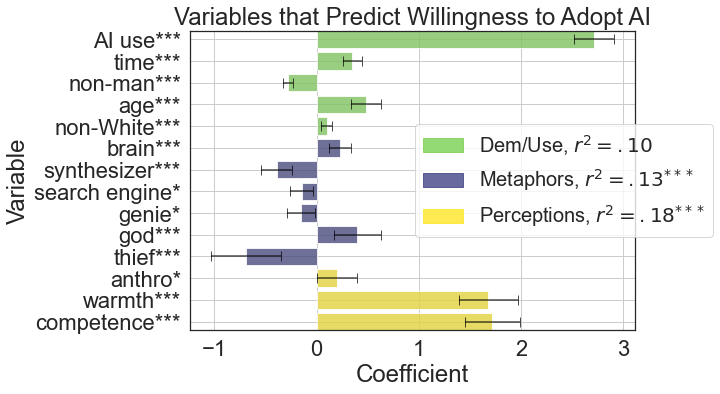

In [246]:
import seaborn as sns
from scipy.stats import sem
font = {
        'size'   : 22}

matplotlib.rc('font', **font)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set(font_scale =2)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})

from sklearn.preprocessing import StandardScaler
import pandas as pd
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'df' is your DataFrame and 'predictors' is a list of columns to standardize
scaler = MinMaxScaler()
# Define a mapping for months to integers
month_mapping = {
    'may': 0, 'june': 1, 'aug': 3, 'sept': 4, 'oct': 5,
    'nov': 6, 'dec': 7, 'jan': 8, 'feb': 9,'mar':10,'apr':11,'aug2024':15
}

# months = ['may', 'june', 'aug', 'sept', 'oct', 'nov', 'dec', 'jan', 'feb','mar','apr','aug2024']

# Convert the month column to a numerical time variable
df['time'] = df['month'].map(month_mapping)

tdf = df.dropna(subset=['trust','anthroscore'])
# tdf = tdf.loc[tdf.gender=='W']
print(len(tdf))

#  anthro, warmth, competence
# control: use of AI, gender, age, non-white
    
df_encoded = pd.get_dummies(tdf, columns=['short_topic'], drop_first=True)

df_encoded = df_encoded.astype({col: int for col in df_encoded.select_dtypes(include='bool').columns})
predictors=['freq_tools_used','time',
        'is_not_man','age','is_not_white',
           'short_topic_assistant', 'short_topic_brain',
       'short_topic_child', 'short_topic_synthesizer',
       'short_topic_search engine', 'short_topic_folklore character',
       'short_topic_friend', 'short_topic_future', 'short_topic_genie',
       'short_topic_god', 'short_topic_library', 'short_topic_computer',
       'short_topic_mirror', 'short_topic_nature', 'short_topic_robot',
       'short_topic_teacher', 'short_topic_thief', 'short_topic_tool',
       'short_topic_wilderness',
                       'anthroscore','warmth2','comp2',

           ]#,'education_ordinal']


df_encoded = df_encoded.astype({col: int for col in df_encoded.select_dtypes(include='bool').columns})
# predictors=['anthroscore','warmth2','comp2','freq_tools_used',
#         'is_not_man','age','is_not_white']#,'education_ordinal']
df_encoded[predictors] = scaler.fit_transform(df_encoded[predictors])
# df_encoded['interaction'] = df_encoded['warmth2']*df_encoded['freq_tools_used']
# predictors.append('interaction')
X = df_encoded[predictors]#,'ethnicity_Black',,'ethnicity_Black',
#        'ethnicity_Hispanic', 'ethnicity_Indian','ethnicity_White']]  # Explanatory variables

# X = tdf[['freq_tools_used','heard_of_1','num_tools_heard_of','agency_composite','valence_composite','trust',
#          'willing',
#         'is_not_man','is_not_white']]  # Explanatory variables
X = sm.add_constant(X)  # Adds intercept
y = df_encoded['willing']  # Outcome variable

model = sm.OLS(y, X).fit()  # Fit the model
print(model.summary())  # Print the results
# Extracting coefficients, p-values, and confidence intervals
coefficients = model.params[1:]
p_values = model.pvalues[1:]
conf_intervals = model.conf_int()[1:]

indices = np.where(p_values < 0.05)[0]
# p_values[p_values > 0.05].index
coefficients = coefficients[indices]
p_values = p_values[indices]
conf_intervals = conf_intervals.iloc[indices]
# Plotting

plt.figure(figsize=(11, 6))
new_ind=pd.Series(coefficients.index).str.replace('short_topic_', '', regex=True).replace('is_not_man','non-man').replace('is_not_man','non-man').replace('anthroscore','anthro').replace('warmth2','warmth').replace('comp2','competence').replace('is_not_white','non-White').replace('num_tools_heard_of','number of AI tools heard of').replace('freq_tools_used','AI use').replace('willing',"willingness to adopt AI").replace('trust','trust in AI').replace('valence_composite','valence toward AI').replace('agency_composite','sense of agency around AI').replace('heard_of_1','heard of ChatGPT')
for i, pvalue in enumerate(p_values):
    if pvalue < 0.001:
                stars='***'
    elif pvalue < 0.01:
                stars = '**'
    elif pvalue < 0.05:
                stars='*'
    else:
                stars=''
    new_ind.iloc[i] = new_ind.iloc[i]+stars

    
colors = ['lightgrey' if p >= 0.05 else 'mediumseagreen' for p in p_values]
print(colors)
color1 = plt.get_cmap('viridis')(0.8)
color2 = plt.get_cmap('viridis')(0.2)
color3 = plt.get_cmap('viridis')(1.5)

colors = ['lightgrey' if p >= 0.05 else color1 for p in p_values[:5]]
colors.extend( ['lightgrey' if p >= 0.05 else color2 for p in p_values[5:-3]])
colors.extend( ['lightgrey' if p >= 0.05 else color3 for p in p_values[-3:]])

# colors = ['mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 
#           'indigo', 'indigo', 'indigo', 'lightgrey',
#           'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightblue', 'lightgrey', 'lightgrey', 'lightblue', 'lightgrey', 'lightgrey', 'lightgrey', 'lightblue', 'lightgrey', 'lightgrey']

# hatches = ['lightgrey' if p >= 0.05 else 'mediumseagreen' for p in p_values]

# 
# sns.set(font_scale = )

sns.barplot(x=coefficients.values, y=new_ind, palette=colors,alpha=0.8)
plt.errorbar(
    x=coefficients.values, y=range(len(coefficients)),
    xerr=[
        coefficients.values - conf_intervals[0].values,
        conf_intervals[1].values - coefficients.values,
    ],
    fmt='none', ecolor='black', capsize=5, alpha=0.7, label="95% CI"
)


from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=color1, edgecolor=color1, alpha=0.8,label='Dem/Use, $r^2 = .10$'),
    Patch(facecolor=color2, edgecolor=color2, alpha=0.8,label='Metaphors, $r^2 = .13^{***}$'),
    Patch(facecolor=color3, edgecolor=color3,alpha=0.8,label='Perceptions, $r^2 = .18^{***}$'),
#     Patch(facecolor='lightgrey', edgecolor='lightgrey', label='Not Significant (p ≥ 0.05)')
]
plt.legend(handles=legend_elements,loc='center right',fontsize=20,bbox_to_anchor=(1.2,0.5))



# Add significance markers
plt.margins(x=0.05,y=0)

    
#     plt.text(coefficients.values[i] + 0.02, i,stars, va='center', color='black')

plt.title('Variables that Predict Willingness to Adopt AI')
plt.xlabel('Coefficient')
plt.ylabel('Variable')
# plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('comp_var_willing_3blocks.pdf')



# Stepwise with adjusted r^2

In [52]:
from scipy.stats import f

dv = 'trust'
df['time'] = df['month'].map(month_mapping)

tdf = df.dropna(subset=['trust','anthroscore'])

df_encoded = pd.get_dummies(tdf, columns=['short_topic'], drop_first=True)
df_encoded = df_encoded.astype({col: int for col in df_encoded.select_dtypes(include='bool').columns})
predictors=['anthroscore','warmth2','comp2','freq_tools_used','time',
       'is_not_man','age','is_not_white',
           'short_topic_assistant', 'short_topic_brain',
       'short_topic_child', 'short_topic_synthesizer',
       'short_topic_search engine', 'short_topic_folklore character',
       'short_topic_friend', 'short_topic_future', 'short_topic_genie',
       'short_topic_god', 'short_topic_library', 'short_topic_computer',
       'short_topic_mirror', 'short_topic_nature', 'short_topic_robot',
       'short_topic_teacher', 'short_topic_thief', 'short_topic_tool',
       'short_topic_wilderness']#,'education_ordinal']
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# df_encoded[predictors] = scaler.fit_transform(df_encoded[predictors])
df_encoded[predictors] = scaler.fit_transform(df_encoded[predictors])


# Block 1: a, b, c
X_block1 = df_encoded[['freq_tools_used',
        'is_not_man','age','is_not_white']]
X_block1 = sm.add_constant(X_block1)  # Add intercept
model_block1 = sm.OLS(df_encoded[dv], X_block1).fit()

# Block 2: a, b, c + d, e
X_block2 = df_encoded[[ 'freq_tools_used',
        'is_not_man','age','is_not_white',
           'short_topic_assistant', 'short_topic_brain','time',
       'short_topic_child', 'short_topic_synthesizer',
       'short_topic_search engine', 'short_topic_folklore character',
       'short_topic_friend', 'short_topic_future', 'short_topic_genie',
       'short_topic_god', 'short_topic_library', 'short_topic_computer',
       'short_topic_mirror', 'short_topic_nature', 'short_topic_robot',
       'short_topic_teacher', 'short_topic_thief', 'short_topic_tool',
       'short_topic_wilderness']]
X_block2 = sm.add_constant(X_block2)
model_block2 = sm.OLS(df_encoded[dv], X_block2).fit()

# Block 3: a, b, c, d, e + f, g, h
X_block3 = df_encoded[[     'anthroscore','warmth2','comp2',
    'freq_tools_used',
        'is_not_man','age','is_not_white',
           'short_topic_assistant', 'short_topic_brain','time',
       'short_topic_child', 'short_topic_synthesizer',
       'short_topic_search engine', 'short_topic_folklore character',
       'short_topic_friend', 'short_topic_future', 'short_topic_genie',
       'short_topic_god', 'short_topic_library', 'short_topic_computer',
       'short_topic_mirror', 'short_topic_nature', 'short_topic_robot',
       'short_topic_teacher', 'short_topic_thief', 'short_topic_tool',
       'short_topic_wilderness']]
X_block3 = sm.add_constant(X_block3)
model_block3 = sm.OLS(df_encoded[dv], X_block3).fit()

# Adjusted R²
adj_r2_block1 = model_block1.rsquared_adj
adj_r2_block2 = model_block2.rsquared_adj
adj_r2_block3 = model_block3.rsquared_adj

increment_adj_block2 = adj_r2_block2 - adj_r2_block1
increment_adj_block3 = adj_r2_block3 - adj_r2_block2

print(f"Adjusted R² (Block 1): {adj_r2_block1:.3f}")
print(f"Incremental Adjusted R² (Block 2): {increment_adj_block2:.3f}")
print(f"Incremental Adjusted R² (Block 3): {increment_adj_block3:.3f}")

# Statistical Significance: F-test
def f_test(r2_full, r2_reduced, p_full, p_reduced, n):
    F_stat = ((r2_full - r2_reduced) / (p_full - p_reduced)) / ((1 - r2_full) / (n - p_full))
    df_encoded1 = p_full - p_reduced
    df_encoded2 = n - p_full
    p_value = 1 - f.cdf(F_stat, df_encoded1, df_encoded2)
    return F_stat, p_value

n = df_encoded.shape[0]
p_block1 = len(X_block1.columns)
p_block2 = len(X_block2.columns)
p_block3 = len(X_block3.columns)

# F-test for Block 2
F_block2, p_block2 = f_test(model_block2.rsquared, model_block1.rsquared, p_block2, p_block1, n)
print(f"F-test Block 2: F={F_block2:.4f}, p={p_block2:.4f}")

# F-test for Block 3
F_block3, p_block3 = f_test(model_block3.rsquared, model_block2.rsquared, p_block3, p_block2, n)
print(f"F-test Block 3: F={F_block3:.4f}, p={p_block3:.4f}")

trust_summary = model_block3.summary2().tables[1]  # Regression coefficients table

# Optional: Convert to a DataFrame for further customization
trust_regression_table = trust_summary.reset_index()

# Rename columns for clarity
trust_regression_table.columns = ['Variable', 'Coefficient', 'Std. Error', 't-value', 'p-value', 'CI Low', 'CI High']


for x,pvalue in zip(trust_regression_table['Coefficient'],trust_regression_table['p-value']):
    if pvalue < 0.001:
                    stars='^{***}$'
    elif pvalue < 0.01:
                stars = '^{**}$'
    elif pvalue < 0.05:
                stars='^{*}$'
    else:
                stars='$ (ns)'
    print('$%.2f%s'%(x,stars))
# Display the regression table
# print(regression_table)

Adjusted R² (Block 1): 0.115
Incremental Adjusted R² (Block 2): 0.033
Incremental Adjusted R² (Block 3): 0.064
F-test Block 2: F=21.1833, p=0.0000
F-test Block 3: F=30.5598, p=0.0000
$1.50^{***}$
$0.24^{***}$
$1.26^{***}$
$1.23^{***}$
$1.54^{***}$
$-0.22^{***}$
$0.38^{***}$
$0.13^{***}$
$0.00$ (ns)
$0.15^{***}$
$0.16^{***}$
$-0.17^{***}$
$-0.22^{***}$
$-0.10^{**}$
$-0.05$ (ns)
$0.03$ (ns)
$-0.03$ (ns)
$-0.02$ (ns)
$0.16^{*}$
$0.04$ (ns)
$-0.00$ (ns)
$-0.17^{***}$
$0.08$ (ns)
$0.02$ (ns)
$-0.04$ (ns)
$-0.60^{***}$
$0.01$ (ns)
$0.01$ (ns)


In [51]:
trust_regression_table

,Variable,Coefficient,Std. Error,t-value,p-value,CI Low,CI High
0,const,1.501315,0.062637,23.968483,1.176024e-123,1.378534,1.624095
1,anthroscore,0.240925,0.060586,3.976611,7.037227e-05,0.122166,0.359684
2,warmth2,1.264987,0.089102,14.196997,2.503272e-45,1.090330,1.439645
3,comp2,1.229476,0.083376,14.746108,9.971108e-49,1.066043,1.392909
4,freq_tools_used,1.537782,0.061342,25.069101,9.243288e-135,1.417541,1.658024
5,is_not_man,-0.221176,0.015288,-14.467023,5.520915e-47,-0.251144,-0.191208
6,age,0.379429,0.046251,8.203636,2.604203e-16,0.288768,0.470091
7,is_not_white,0.126306,0.015802,7.993029,1.454489e-15,0.095331,0.157281
8,short_topic_assistant,0.003326,0.035898,0.092647,9.261854e-01,-0.067040,0.073692
9,short_topic_brain,0.151049,0.032692,4.620405,3.875398e-06,0.086967,0.215131


In [23]:
dv = 'willing'
tdf = df.dropna(subset=['willing','anthroscore'])

df_encoded = pd.get_dummies(tdf, columns=['short_topic'], drop_first=True)
df_encoded = df_encoded.astype({col: int for col in df_encoded.select_dtypes(include='bool').columns})
predictors=['anthroscore','warmth2','comp2','freq_tools_used',
            'time',
        'is_not_man','age','is_not_white', 'short_topic_assistant', 'short_topic_brain',
       'short_topic_child', 'short_topic_synthesizer',
       'short_topic_search engine', 'short_topic_folklore character',
       'short_topic_friend', 'short_topic_future', 'short_topic_genie',
       'short_topic_god', 'short_topic_library', 'short_topic_computer',
       'short_topic_mirror', 'short_topic_nature', 'short_topic_robot',
       'short_topic_teacher', 'short_topic_thief', 'short_topic_tool',
       'short_topic_wilderness']#,'education_ordinal']
df_encoded[predictors] = scaler.fit_transform(df_encoded[predictors])


# Block 1: a, b, c
X_block1 = df_encoded[['freq_tools_used',
        'is_not_man','age','is_not_white']]
X_block1 = sm.add_constant(X_block1)  # Add intercept
model_block1 = sm.OLS(df_encoded[dv], X_block1).fit()

# Block 2: a, b, c + d, e
X_block2 = df_encoded[[ 'freq_tools_used',
        'is_not_man','age','is_not_white',
          'short_topic_assistant', 'short_topic_brain',
       'short_topic_child', 'short_topic_synthesizer',
       'short_topic_search engine', 'short_topic_folklore character',
       'short_topic_friend', 'short_topic_future', 'short_topic_genie',
       'short_topic_god', 'short_topic_library', 'short_topic_computer',
       'short_topic_mirror', 'short_topic_nature', 'short_topic_robot',
       'short_topic_teacher', 'short_topic_thief', 'short_topic_tool',
       'short_topic_wilderness']]
X_block2 = sm.add_constant(X_block2)
model_block2 = sm.OLS(df_encoded[dv], X_block2).fit()

# Block 3: a, b, c, d, e + f, g, h
X_block3 = df_encoded[[     'anthroscore','warmth2','comp2',
    'freq_tools_used',
        'is_not_man','age','is_not_white',
                       
                    'time','short_topic_assistant', 'short_topic_brain',
       'short_topic_child', 'short_topic_synthesizer',
       'short_topic_search engine', 'short_topic_folklore character',
       'short_topic_friend', 'short_topic_future', 'short_topic_genie',
       'short_topic_god', 'short_topic_library', 'short_topic_computer',
       'short_topic_mirror', 'short_topic_nature', 'short_topic_robot',
       'short_topic_teacher', 'short_topic_thief', 'short_topic_tool',
       'short_topic_wilderness']]
X_block3 = sm.add_constant(X_block3)
model_block3 = sm.OLS(df_encoded[dv], X_block3).fit()

# Adjusted R²
adj_r2_block1 = model_block1.rsquared_adj
adj_r2_block2 = model_block2.rsquared_adj
adj_r2_block3 = model_block3.rsquared_adj

increment_adj_block2 = adj_r2_block2 - adj_r2_block1
increment_adj_block3 = adj_r2_block3 - adj_r2_block2

print(f"Adjusted R² (Block 1): {adj_r2_block1:.3f}")
print(f"Incremental Adjusted R² (Block 2): {increment_adj_block2:.3f}")
print(f"Incremental Adjusted R² (Block 3): {increment_adj_block3:.3f}")

# Statistical Significance: F-test
def f_test(r2_full, r2_reduced, p_full, p_reduced, n):
    F_stat = ((r2_full - r2_reduced) / (p_full - p_reduced)) / ((1 - r2_full) / (n - p_full))
    df_encoded1 = p_full - p_reduced
    df_encoded2 = n - p_full
    p_value = 1 - f.cdf(F_stat, df_encoded1, df_encoded2)
    return F_stat, p_value

n = df_encoded.shape[0]
p_block1 = len(X_block1.columns)
p_block2 = len(X_block2.columns)
p_block3 = len(X_block3.columns)

# F-test for Block 2
F_block2, p_block2 = f_test(model_block2.rsquared, model_block1.rsquared, p_block2, p_block1, n)
print(f"F-test Block 2: F={F_block2:.4f}, p={p_block2:.4f}")

# F-test for Block 3
F_block3, p_block3 = f_test(model_block3.rsquared, model_block2.rsquared, p_block3, p_block2, n)
print(f"F-test Block 3: F={F_block3:.4f}, p={p_block3:.4f}")

willing_summary = model_block3.summary2().tables[1]  # Regression coefficients table

# Optional: Convert to a DataFrame for further customization
willing_regression_table = willing_summary.reset_index()

# Rename columns for clarity
willing_regression_table.columns = ['Variable', 'Coefficient', 'Std. Error', 't-value', 'p-value', 'CI Low', 'CI High']

# Display the regression table
# print(regression_table)

Adjusted R² (Block 1): 0.104
Incremental Adjusted R² (Block 2): 0.022
Incremental Adjusted R² (Block 3): 0.051
F-test Block 2: F=14.7201, p=0.0000
F-test Block 3: F=23.2833, p=0.0000


# Appendix figs

10552
                            OLS Regression Results                            
Dep. Variable:                  trust   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     425.2
Date:                Thu, 16 Jan 2025   Prob (F-statistic):          8.84e-261
Time:                        14:51:55   Log-Likelihood:                -12743.
No. Observations:               10552   AIC:                         2.549e+04
Df Residuals:                   10548   BIC:                         2.552e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.5026      0.056     26.960

<ipython-input-254-1927122aa9fa>:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients.values, y=new_ind, palette=colors,alpha=0.8)
<ipython-input-254-1927122aa9fa>:127: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(x=coefficients.values, y=new_ind, palette=colors,alpha=0.8)


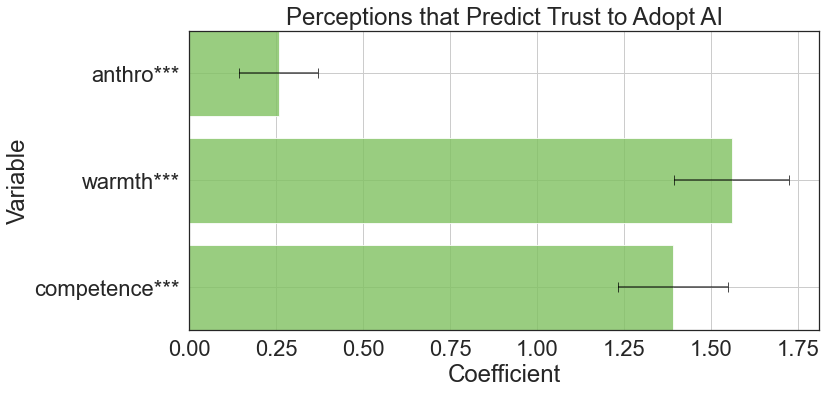

In [254]:
import seaborn as sns
from scipy.stats import sem
font = {
        'size'   : 22}

matplotlib.rc('font', **font)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set(font_scale =2)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})

from sklearn.preprocessing import StandardScaler
import pandas as pd
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'df' is your DataFrame and 'predictors' is a list of columns to standardize
scaler = MinMaxScaler()
# Define a mapping for months to integers
month_mapping = {
    'may': 0, 'june': 1, 'aug': 3, 'sept': 4, 'oct': 5,
    'nov': 6, 'dec': 7, 'jan': 8, 'feb': 9,'mar':10,'apr':11,'aug2024':15
}

# months = ['may', 'june', 'aug', 'sept', 'oct', 'nov', 'dec', 'jan', 'feb','mar','apr','aug2024']

# Convert the month column to a numerical time variable
df['time'] = df['month'].map(month_mapping)

tdf = df.dropna(subset=['trust','anthroscore'])
# tdf = tdf.loc[tdf.gender=='W']
print(len(tdf))

#  anthro, warmth, competence
# control: use of AI, gender, age, non-white
    
df_encoded = pd.get_dummies(tdf, columns=['short_topic'], drop_first=True)

df_encoded = df_encoded.astype({col: int for col in df_encoded.select_dtypes(include='bool').columns})
predictors=[
#     'freq_tools_used','time',
#         'is_not_man','age','is_not_white',
#            'short_topic_assistant', 'short_topic_brain',
#        'short_topic_child', 'short_topic_synthesizer',
#        'short_topic_search engine', 'short_topic_folklore character',
#        'short_topic_friend', 'short_topic_future', 'short_topic_genie',
#        'short_topic_god', 'short_topic_library', 'short_topic_computer',
#        'short_topic_mirror', 'short_topic_nature', 'short_topic_robot',
#        'short_topic_teacher', 'short_topic_thief', 'short_topic_tool',
#        'short_topic_wilderness',
                       'anthroscore','warmth2','comp2',

           ]#,'education_ordinal']


df_encoded = df_encoded.astype({col: int for col in df_encoded.select_dtypes(include='bool').columns})
# predictors=['anthroscore','warmth2','comp2','freq_tools_used',
#         'is_not_man','age','is_not_white']#,'education_ordinal']

df_encoded[predictors] = scaler.fit_transform(df_encoded[predictors])
# df_encoded['interaction'] = df_encoded['warmth2']*df_encoded['freq_tools_used']
# predictors.append('interaction')
X = df_encoded[predictors]#,'ethnicity_Black',,'ethnicity_Black',
#        'ethnicity_Hispanic', 'ethnicity_Indian','ethnicity_White']]  # Explanatory variables

# X = tdf[['freq_tools_used','heard_of_1','num_tools_heard_of','agency_composite','valence_composite','trust',
#          'willing',
#         'is_not_man','is_not_white']]  # Explanatory variables
X = sm.add_constant(X)  # Adds intercept
y = df_encoded['trust']  # Outcome variable

model = sm.OLS(y, X).fit()  # Fit the model
print(model.summary())  # Print the results
# Extracting coefficients, p-values, and confidence intervals
coefficients = model.params[1:]
p_values = model.pvalues[1:]
conf_intervals = model.conf_int()[1:]

indices = np.where(p_values < 0.05)[0]
# p_values[p_values > 0.05].index
coefficients = coefficients[indices]
p_values = p_values[indices]
conf_intervals = conf_intervals.iloc[indices]
# Plotting

plt.figure(figsize=(12, 6))
new_ind=pd.Series(coefficients.index).str.replace('short_topic_', '', regex=True).replace('is_not_man','non-man').replace('is_not_man','non-man').replace('anthroscore','anthro').replace('warmth2','warmth').replace('comp2','competence').replace('is_not_white','non-White').replace('num_tools_heard_of','number of AI tools heard of').replace('freq_tools_used','AI use').replace('willing',"willingness to adopt AI").replace('trust','trust in AI').replace('valence_composite','valence toward AI').replace('agency_composite','sense of agency around AI').replace('heard_of_1','heard of ChatGPT')
for i, pvalue in enumerate(p_values):
    if pvalue < 0.001:
                stars='***'
    elif pvalue < 0.01:
                stars = '**'
    elif pvalue < 0.05:
                stars='*'
    else:
                stars=''
    new_ind.iloc[i] = new_ind.iloc[i]+stars

    
colors = ['lightgrey' if p >= 0.05 else 'mediumseagreen' for p in p_values]
print(colors)
color1 = plt.get_cmap('viridis')(0.8)
color2 = plt.get_cmap('viridis')(0.2)
color3 = plt.get_cmap('viridis')(1.5)

colors = ['lightgrey' if p >= 0.05 else color1 for p in p_values[:5]]
colors.extend( ['lightgrey' if p >= 0.05 else color2 for p in p_values[5:-3]])
colors.extend( ['lightgrey' if p >= 0.05 else color3 for p in p_values[-3:]])

# colors = ['mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 
#           'indigo', 'indigo', 'indigo', 'lightgrey',
#           'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightblue', 'lightgrey', 'lightgrey', 'lightblue', 'lightgrey', 'lightgrey', 'lightgrey', 'lightblue', 'lightgrey', 'lightgrey']

# hatches = ['lightgrey' if p >= 0.05 else 'mediumseagreen' for p in p_values]

# 
# sns.set(font_scale = )

sns.barplot(x=coefficients.values, y=new_ind, palette=colors,alpha=0.8)
plt.errorbar(
    x=coefficients.values, y=range(len(coefficients)),
    xerr=[
        coefficients.values - conf_intervals[0].values,
        conf_intervals[1].values - coefficients.values,
    ],
    fmt='none', ecolor='black', capsize=5, alpha=0.7, label="95% CI"
)


from matplotlib.patches import Patch
# legend_elements = [
#    Patch(facecolor=color1, edgecolor=color1, alpha=0.8,label='Dem/Use, $r^2 = .12$'),
#     Patch(facecolor=color2, edgecolor=color2, alpha=0.8,label='Metaphors, $r^2 = .15^{***}$'),
#     Patch(facecolor=color3, edgecolor=color3,alpha=0.8,label='Perceptions, $r^2 = .21^{***}$'),
# ]
# plt.legend(handles=legend_elements,loc='center right',fontsize=20,bbox_to_anchor=(1.2,0.5))
# # title="Variable Significance")#, loc='lower right')



# Add significance markers
plt.margins(x=0.05,y=0)

    
#     plt.text(coefficients.values[i] + 0.02, i,stars, va='center', color='black')


plt.title('Perceptions that Predict Trust to Adopt AI')
plt.xlabel('Coefficient')
plt.ylabel('Variable')
# plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('perceptions_regression_trust.pdf')



10552
                            OLS Regression Results                            
Dep. Variable:                willing   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     304.0
Date:                Thu, 16 Jan 2025   Prob (F-statistic):          2.73e-189
Time:                        14:51:53   Log-Likelihood:                -17936.
No. Observations:               10552   AIC:                         3.588e+04
Df Residuals:                   10548   BIC:                         3.591e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.6297      0.091     17.877

<ipython-input-253-d98bed7ad083>:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients.values, y=new_ind, palette=colors,alpha=0.8)
<ipython-input-253-d98bed7ad083>:126: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(x=coefficients.values, y=new_ind, palette=colors,alpha=0.8)


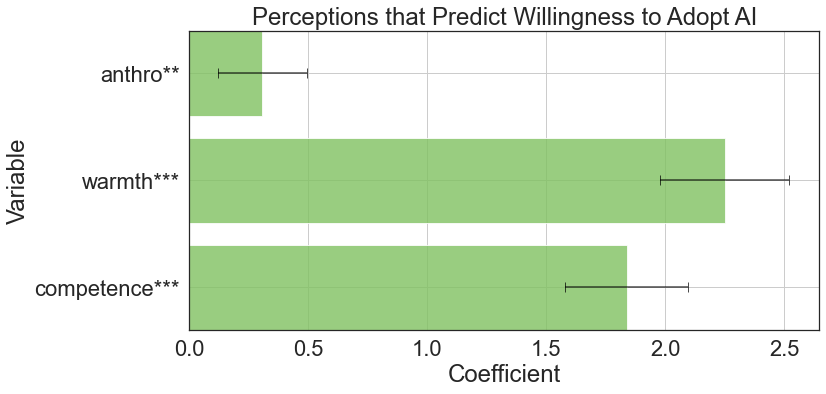

In [253]:
import seaborn as sns
from scipy.stats import sem
font = {
        'size'   : 22}

matplotlib.rc('font', **font)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set(font_scale =2)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})

from sklearn.preprocessing import StandardScaler
import pandas as pd
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'df' is your DataFrame and 'predictors' is a list of columns to standardize
scaler = MinMaxScaler()
# Define a mapping for months to integers
month_mapping = {
    'may': 0, 'june': 1, 'aug': 3, 'sept': 4, 'oct': 5,
    'nov': 6, 'dec': 7, 'jan': 8, 'feb': 9,'mar':10,'apr':11,'aug2024':15
}

# months = ['may', 'june', 'aug', 'sept', 'oct', 'nov', 'dec', 'jan', 'feb','mar','apr','aug2024']

# Convert the month column to a numerical time variable
df['time'] = df['month'].map(month_mapping)

tdf = df.dropna(subset=['trust','anthroscore'])
# tdf = tdf.loc[tdf.gender=='W']
print(len(tdf))

#  anthro, warmth, competence
# control: use of AI, gender, age, non-white
    
df_encoded = pd.get_dummies(tdf, columns=['short_topic'], drop_first=True)

df_encoded = df_encoded.astype({col: int for col in df_encoded.select_dtypes(include='bool').columns})
predictors=[
#     'freq_tools_used','time',
#         'is_not_man','age','is_not_white',
#            'short_topic_assistant', 'short_topic_brain',
#        'short_topic_child', 'short_topic_synthesizer',
#        'short_topic_search engine', 'short_topic_folklore character',
#        'short_topic_friend', 'short_topic_future', 'short_topic_genie',
#        'short_topic_god', 'short_topic_library', 'short_topic_computer',
#        'short_topic_mirror', 'short_topic_nature', 'short_topic_robot',
#        'short_topic_teacher', 'short_topic_thief', 'short_topic_tool',
#        'short_topic_wilderness',
                       'anthroscore','warmth2','comp2',

           ]#,'education_ordinal']


df_encoded = df_encoded.astype({col: int for col in df_encoded.select_dtypes(include='bool').columns})
# predictors=['anthroscore','warmth2','comp2','freq_tools_used',
#         'is_not_man','age','is_not_white']#,'education_ordinal']
df_encoded[predictors] = scaler.fit_transform(df_encoded[predictors])
# df_encoded['interaction'] = df_encoded['warmth2']*df_encoded['freq_tools_used']
# predictors.append('interaction')
X = df_encoded[predictors]#,'ethnicity_Black',,'ethnicity_Black',
#        'ethnicity_Hispanic', 'ethnicity_Indian','ethnicity_White']]  # Explanatory variables

# X = tdf[['freq_tools_used','heard_of_1','num_tools_heard_of','agency_composite','valence_composite','trust',
#          'willing',
#         'is_not_man','is_not_white']]  # Explanatory variables
X = sm.add_constant(X)  # Adds intercept
y = df_encoded['willing']  # Outcome variable

model = sm.OLS(y, X).fit()  # Fit the model
print(model.summary())  # Print the results
# Extracting coefficients, p-values, and confidence intervals
coefficients = model.params[1:]
p_values = model.pvalues[1:]
conf_intervals = model.conf_int()[1:]

indices = np.where(p_values < 0.05)[0]
# p_values[p_values > 0.05].index
coefficients = coefficients[indices]
p_values = p_values[indices]
conf_intervals = conf_intervals.iloc[indices]
# Plotting

plt.figure(figsize=(12, 6))
new_ind=pd.Series(coefficients.index).str.replace('short_topic_', '', regex=True).replace('is_not_man','non-man').replace('is_not_man','non-man').replace('anthroscore','anthro').replace('warmth2','warmth').replace('comp2','competence').replace('is_not_white','non-White').replace('num_tools_heard_of','number of AI tools heard of').replace('freq_tools_used','AI use').replace('willing',"willingness to adopt AI").replace('trust','trust in AI').replace('valence_composite','valence toward AI').replace('agency_composite','sense of agency around AI').replace('heard_of_1','heard of ChatGPT')
for i, pvalue in enumerate(p_values):
    if pvalue < 0.001:
                stars='***'
    elif pvalue < 0.01:
                stars = '**'
    elif pvalue < 0.05:
                stars='*'
    else:
                stars=''
    new_ind.iloc[i] = new_ind.iloc[i]+stars

    
colors = ['lightgrey' if p >= 0.05 else 'mediumseagreen' for p in p_values]
print(colors)
color1 = plt.get_cmap('viridis')(0.8)
color2 = plt.get_cmap('viridis')(0.2)
color3 = plt.get_cmap('viridis')(1.5)

colors = ['lightgrey' if p >= 0.05 else color1 for p in p_values[:5]]
colors.extend( ['lightgrey' if p >= 0.05 else color2 for p in p_values[5:-3]])
colors.extend( ['lightgrey' if p >= 0.05 else color3 for p in p_values[-3:]])

# colors = ['mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 
#           'indigo', 'indigo', 'indigo', 'lightgrey',
#           'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightblue', 'lightgrey', 'lightgrey', 'lightblue', 'lightgrey', 'lightgrey', 'lightgrey', 'lightblue', 'lightgrey', 'lightgrey']

# hatches = ['lightgrey' if p >= 0.05 else 'mediumseagreen' for p in p_values]

# 
# sns.set(font_scale = )

sns.barplot(x=coefficients.values, y=new_ind, palette=colors,alpha=0.8)
plt.errorbar(
    x=coefficients.values, y=range(len(coefficients)),
    xerr=[
        coefficients.values - conf_intervals[0].values,
        conf_intervals[1].values - coefficients.values,
    ],
    fmt='none', ecolor='black', capsize=5, alpha=0.7, label="95% CI"
)


from matplotlib.patches import Patch
# legend_elements = [
#    Patch(facecolor=color1, edgecolor=color1, alpha=0.8,label='Dem/Use, $r^2 = .12$'),
#     Patch(facecolor=color2, edgecolor=color2, alpha=0.8,label='Metaphors, $r^2 = .15^{***}$'),
#     Patch(facecolor=color3, edgecolor=color3,alpha=0.8,label='Perceptions, $r^2 = .21^{***}$'),
# ]
# plt.legend(handles=legend_elements,loc='center right',fontsize=20,bbox_to_anchor=(1.2,0.5))
# # title="Variable Significance")#, loc='lower right')



# Add significance markers
plt.margins(x=0.05,y=0)

    
#     plt.text(coefficients.values[i] + 0.02, i,stars, va='center', color='black')

plt.title('Perceptions that Predict Willingness to Adopt AI')
plt.xlabel('Coefficient')
plt.ylabel('Variable')
# plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('perceptions_regression_willing.pdf')



10552
                            OLS Regression Results                            
Dep. Variable:                willing   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     17.81
Date:                Thu, 16 Jan 2025   Prob (F-statistic):           2.74e-59
Time:                        14:51:49   Log-Likelihood:                -18206.
No. Observations:               10552   AIC:                         3.645e+04
Df Residuals:                   10532   BIC:                         3.660e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const 

<ipython-input-252-72fad6656a97>:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients.values, y=new_ind, palette=colors,alpha=0.8)


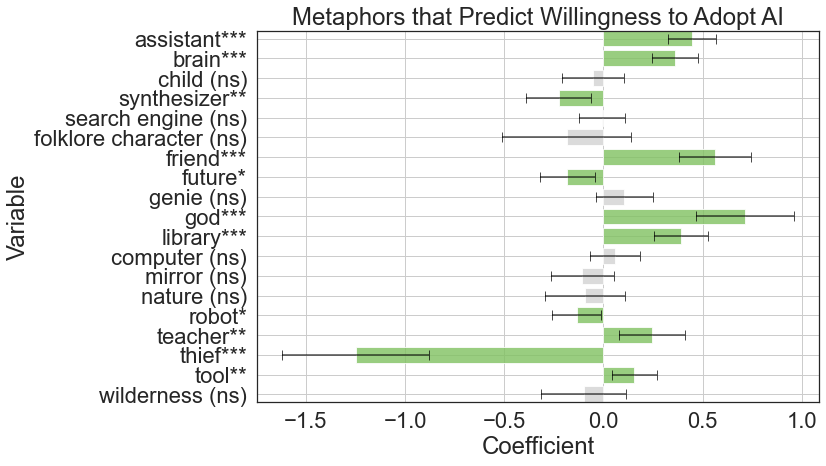

In [252]:
import seaborn as sns
from scipy.stats import sem
font = {
        'size'   : 22}

matplotlib.rc('font', **font)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set(font_scale =2)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})

from sklearn.preprocessing import StandardScaler
import pandas as pd
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'df' is your DataFrame and 'predictors' is a list of columns to standardize
scaler = MinMaxScaler()
# Define a mapping for months to integers
month_mapping = {
    'may': 0, 'june': 1, 'aug': 3, 'sept': 4, 'oct': 5,
    'nov': 6, 'dec': 7, 'jan': 8, 'feb': 9,'mar':10,'apr':11,'aug2024':15
}

# months = ['may', 'june', 'aug', 'sept', 'oct', 'nov', 'dec', 'jan', 'feb','mar','apr','aug2024']

# Convert the month column to a numerical time variable
df['time'] = df['month'].map(month_mapping)

tdf = df.dropna(subset=['trust','anthroscore'])
# tdf = tdf.loc[tdf.gender=='W']
print(len(tdf))

#  anthro, warmth, competence
# control: use of AI, gender, age, non-white
    
df_encoded = pd.get_dummies(tdf, columns=['short_topic'], drop_first=True)

df_encoded = df_encoded.astype({col: int for col in df_encoded.select_dtypes(include='bool').columns})
predictors=[
#     'freq_tools_used','time',
#         'is_not_man','age','is_not_white',
           'short_topic_assistant', 'short_topic_brain',
       'short_topic_child', 'short_topic_synthesizer',
       'short_topic_search engine', 'short_topic_folklore character',
       'short_topic_friend', 'short_topic_future', 'short_topic_genie',
       'short_topic_god', 'short_topic_library', 'short_topic_computer',
       'short_topic_mirror', 'short_topic_nature', 'short_topic_robot',
       'short_topic_teacher', 'short_topic_thief', 'short_topic_tool',
       'short_topic_wilderness',
#                        'anthroscore','warmth2','comp2',

           ]#,'education_ordinal']


df_encoded = df_encoded.astype({col: int for col in df_encoded.select_dtypes(include='bool').columns})
# predictors=['anthroscore','warmth2','comp2','freq_tools_used',
#         'is_not_man','age','is_not_white']#,'education_ordinal']
df_encoded[predictors] = scaler.fit_transform(df_encoded[predictors])
# df_encoded['interaction'] = df_encoded['warmth2']*df_encoded['freq_tools_used']
# predictors.append('interaction')
X = df_encoded[predictors]#,'ethnicity_Black',,'ethnicity_Black',
#        'ethnicity_Hispanic', 'ethnicity_Indian','ethnicity_White']]  # Explanatory variables

# X = tdf[['freq_tools_used','heard_of_1','num_tools_heard_of','agency_composite','valence_composite','trust',
#          'willing',
#         'is_not_man','is_not_white']]  # Explanatory variables
X = sm.add_constant(X)  # Adds intercept
y = df_encoded['willing']  # Outcome variable

model = sm.OLS(y, X).fit()  # Fit the model
print(model.summary())  # Print the results
# Extracting coefficients, p-values, and confidence intervals
coefficients = model.params[1:]
p_values = model.pvalues[1:]
conf_intervals = model.conf_int()[1:]

indices = np.where(p_values < 0.05)[0]
# p_values[p_values > 0.05].index
# coefficients = coefficients[indices]
# p_values = p_values[indices]
# conf_intervals = conf_intervals.iloc[indices]
# Plotting

plt.figure(figsize=(12, 7))
new_ind=pd.Series(coefficients.index).str.replace('short_topic_', '', regex=True).replace('is_not_man','non-man').replace('is_not_man','non-man').replace('anthroscore','anthro').replace('warmth2','warmth').replace('comp2','competence').replace('is_not_white','non-White').replace('num_tools_heard_of','number of AI tools heard of').replace('freq_tools_used','AI use').replace('willing',"willingness to adopt AI").replace('trust','trust in AI').replace('valence_composite','valence toward AI').replace('agency_composite','sense of agency around AI').replace('heard_of_1','heard of ChatGPT')
for i, pvalue in enumerate(p_values):
    if pvalue < 0.001:
                stars='***'
    elif pvalue < 0.01:
                stars = '**'
    elif pvalue < 0.05:
                stars='*'
    else:
                stars=' (ns)'
    new_ind.iloc[i] = new_ind.iloc[i]+stars

    
colors = ['lightgrey' if p >= 0.05 else 'mediumseagreen' for p in p_values]
print(colors)
color1 = plt.get_cmap('viridis')(0.8)
color2 = plt.get_cmap('viridis')(0.2)
color3 = plt.get_cmap('viridis')(1.5)

colors = ['lightgrey' if p >= 0.05 else color1 for p in p_values]
# colors.extend( ['lightgrey' if p >= 0.05 else color2 for p in p_values[5:-3]])
# colors.extend( ['lightgrey' if p >= 0.05 else color3 for p in p_values[-3:]])

# colors = ['mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 
#           'indigo', 'indigo', 'indigo', 'lightgrey',
#           'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightblue', 'lightgrey', 'lightgrey', 'lightblue', 'lightgrey', 'lightgrey', 'lightgrey', 'lightblue', 'lightgrey', 'lightgrey']

# hatches = ['lightgrey' if p >= 0.05 else 'mediumseagreen' for p in p_values]

# 
# sns.set(font_scale = )

sns.barplot(x=coefficients.values, y=new_ind, palette=colors,alpha=0.8)
plt.errorbar(
    x=coefficients.values, y=range(len(coefficients)),
    xerr=[
        coefficients.values - conf_intervals[0].values,
        conf_intervals[1].values - coefficients.values,
    ],
    fmt='none', ecolor='black', capsize=5, alpha=0.7, label="95% CI"
)


from matplotlib.patches import Patch
# legend_elements = [
#    Patch(facecolor=color1, edgecolor=color1, alpha=0.8,label='Dem/Use, $r^2 = .12$'),
#     Patch(facecolor=color2, edgecolor=color2, alpha=0.8,label='Metaphors, $r^2 = .15^{***}$'),
#     Patch(facecolor=color3, edgecolor=color3,alpha=0.8,label='Perceptions, $r^2 = .21^{***}$'),
# ]
# plt.legend(handles=legend_elements,loc='center right',fontsize=20,bbox_to_anchor=(1.2,0.5))
# # title="Variable Significance")#, loc='lower right')



# Add significance markers
plt.margins(x=0.05,y=0)

    
#     plt.text(coefficients.values[i] + 0.02, i,stars, va='center', color='black')

plt.title('Metaphors that Predict Willingness to Adopt AI')
plt.xlabel('Coefficient')
plt.ylabel('Variable')
# plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('metaphors_regression_willing.pdf')



10552
                            OLS Regression Results                            
Dep. Variable:                  trust   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     23.36
Date:                Thu, 16 Jan 2025   Prob (F-statistic):           2.07e-80
Time:                        14:51:36   Log-Likelihood:                -13128.
No. Observations:               10552   AIC:                         2.630e+04
Df Residuals:                   10532   BIC:                         2.644e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const 

<ipython-input-250-131c5c3ade39>:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients.values, y=new_ind, palette=colors,alpha=0.8)


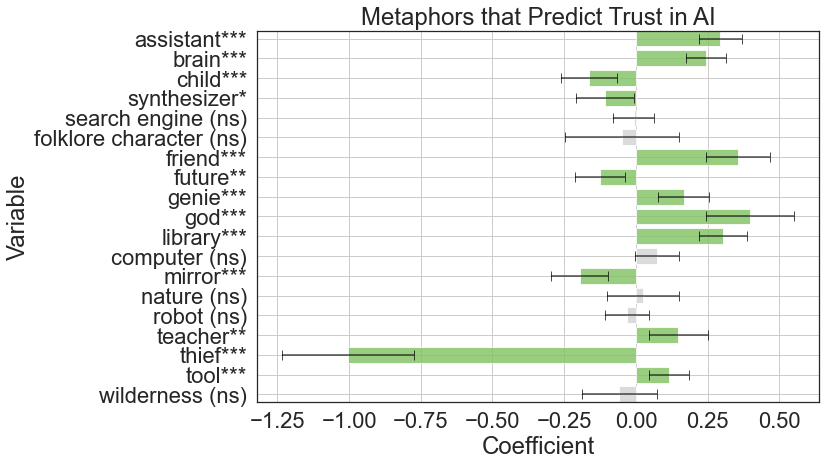

In [250]:
import seaborn as sns
from scipy.stats import sem
font = {
        'size'   : 22}

matplotlib.rc('font', **font)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set(font_scale =2)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})

from sklearn.preprocessing import StandardScaler,MinMaxScaler
import pandas as pd
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'df' is your DataFrame and 'predictors' is a list of columns to standardize
scaler = MinMaxScaler()
# Define a mapping for months to integers
month_mapping = {
    'may': 0, 'june': 1, 'aug': 3, 'sept': 4, 'oct': 5,
    'nov': 6, 'dec': 7, 'jan': 8, 'feb': 9,'mar':10,'apr':11,'aug2024':15
}

# months = ['may', 'june', 'aug', 'sept', 'oct', 'nov', 'dec', 'jan', 'feb','mar','apr','aug2024']

# Convert the month column to a numerical time variable
df['time'] = df['month'].map(month_mapping)

tdf = df.dropna(subset=['trust','anthroscore'])
# tdf = tdf.loc[tdf.gender=='W']
print(len(tdf))

#  anthro, warmth, competence
# control: use of AI, gender, age, non-white
    
df_encoded = pd.get_dummies(tdf, columns=['short_topic'], drop_first=True)

df_encoded = df_encoded.astype({col: int for col in df_encoded.select_dtypes(include='bool').columns})
predictors=[
#     'freq_tools_used','time',
#         'is_not_man','age','is_not_white',
           'short_topic_assistant', 'short_topic_brain',
       'short_topic_child', 'short_topic_synthesizer',
       'short_topic_search engine', 'short_topic_folklore character',
       'short_topic_friend', 'short_topic_future', 'short_topic_genie',
       'short_topic_god', 'short_topic_library', 'short_topic_computer',
       'short_topic_mirror', 'short_topic_nature', 'short_topic_robot',
       'short_topic_teacher', 'short_topic_thief', 'short_topic_tool',
       'short_topic_wilderness',
#                        'anthroscore','warmth2','comp2',

           ]#,'education_ordinal']


df_encoded = df_encoded.astype({col: int for col in df_encoded.select_dtypes(include='bool').columns})
# predictors=['anthroscore','warmth2','comp2','freq_tools_used',
#         'is_not_man','age','is_not_white']#,'education_ordinal']
df_encoded[predictors] = scaler.fit_transform(df_encoded[predictors])
# df_encoded['interaction'] = df_encoded['warmth2']*df_encoded['freq_tools_used']
# predictors.append('interaction')
X = df_encoded[predictors]#,'ethnicity_Black',,'ethnicity_Black',
#        'ethnicity_Hispanic', 'ethnicity_Indian','ethnicity_White']]  # Explanatory variables

# X = tdf[['freq_tools_used','heard_of_1','num_tools_heard_of','agency_composite','valence_composite','trust',
#          'willing',
#         'is_not_man','is_not_white']]  # Explanatory variables
X = sm.add_constant(X)  # Adds intercept
y = df_encoded['trust']  # Outcome variable

model = sm.OLS(y, X).fit()  # Fit the model
print(model.summary())  # Print the results
# Extracting coefficients, p-values, and confidence intervals
coefficients = model.params[1:]
p_values = model.pvalues[1:]
conf_intervals = model.conf_int()[1:]

indices = np.where(p_values < 0.05)[0]
# p_values[p_values > 0.05].index
# coefficients = coefficients[indices]
# p_values = p_values[indices]
# conf_intervals = conf_intervals.iloc[indices]
# Plotting

plt.figure(figsize=(12, 7))
new_ind=pd.Series(coefficients.index).str.replace('short_topic_', '', regex=True).replace('is_not_man','non-man').replace('is_not_man','non-man').replace('anthroscore','anthro').replace('warmth2','warmth').replace('comp2','competence').replace('is_not_white','non-White').replace('num_tools_heard_of','number of AI tools heard of').replace('freq_tools_used','AI use').replace('willing',"willingness to adopt AI").replace('trust','trust in AI').replace('valence_composite','valence toward AI').replace('agency_composite','sense of agency around AI').replace('heard_of_1','heard of ChatGPT')
for i, pvalue in enumerate(p_values):
    if pvalue < 0.001:
                stars='***'
    elif pvalue < 0.01:
                stars = '**'
    elif pvalue < 0.05:
                stars='*'
    else:
                stars=' (ns)'
    new_ind.iloc[i] = new_ind.iloc[i]+stars

    
colors = ['lightgrey' if p >= 0.05 else 'mediumseagreen' for p in p_values]
print(colors)
color1 = plt.get_cmap('viridis')(0.8)
color2 = plt.get_cmap('viridis')(0.2)
color3 = plt.get_cmap('viridis')(1.5)

colors = ['lightgrey' if p >= 0.05 else color1 for p in p_values]
# colors.extend( ['lightgrey' if p >= 0.05 else color2 for p in p_values[5:-3]])
# colors.extend( ['lightgrey' if p >= 0.05 else color3 for p in p_values[-3:]])

# colors = ['mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 
#           'indigo', 'indigo', 'indigo', 'lightgrey',
#           'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightblue', 'lightgrey', 'lightgrey', 'lightblue', 'lightgrey', 'lightgrey', 'lightgrey', 'lightblue', 'lightgrey', 'lightgrey']

# hatches = ['lightgrey' if p >= 0.05 else 'mediumseagreen' for p in p_values]

# 
# sns.set(font_scale = )

sns.barplot(x=coefficients.values, y=new_ind, palette=colors,alpha=0.8)
plt.errorbar(
    x=coefficients.values, y=range(len(coefficients)),
    xerr=[
        coefficients.values - conf_intervals[0].values,
        conf_intervals[1].values - coefficients.values,
    ],
    fmt='none', ecolor='black', capsize=5, alpha=0.7, label="95% CI"
)


from matplotlib.patches import Patch
# legend_elements = [
#    Patch(facecolor=color1, edgecolor=color1, alpha=0.8,label='Dem/Use, $r^2 = .12$'),
#     Patch(facecolor=color2, edgecolor=color2, alpha=0.8,label='Metaphors, $r^2 = .15^{***}$'),
#     Patch(facecolor=color3, edgecolor=color3,alpha=0.8,label='Perceptions, $r^2 = .21^{***}$'),
# ]
# plt.legend(handles=legend_elements,loc='center right',fontsize=20,bbox_to_anchor=(1.2,0.5))
# # title="Variable Significance")#, loc='lower right')



# Add significance markers
plt.margins(x=0.05,y=0)

    
#     plt.text(coefficients.values[i] + 0.02, i,stars, va='center', color='black')

plt.title('Metaphors that Predict Trust in AI')
plt.xlabel('Coefficient')
plt.ylabel('Variable')
# plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('metaphors_regression_trust.pdf')
# 


# Regression tables

In [19]:
trust_regression_table = 
for x,pvalue in zip(trust_regression_table['Coefficient'],willing_regression_table['p-value']):
    if pvalue < 0.001:
                    stars='^{***}$'
    elif pvalue < 0.01:
                stars = '^{**}$'
    elif pvalue < 0.05:
                stars='^{*}$'
    else:
                stars='$ (ns)'
    print('$%.2f%s'%(x,stars))

,Variable,Coefficient,Std. Error,t-value,p-value,CI Low,CI High
0,const,1.501315,0.062637,23.968483,1.176024e-123,1.378534,1.624095
1,anthroscore,0.240925,0.060586,3.976611,7.037227e-05,0.122166,0.359684
2,warmth2,1.264987,0.089102,14.196997,2.503272e-45,1.090330,1.439645
3,comp2,1.229476,0.083376,14.746108,9.971108e-49,1.066043,1.392909
4,freq_tools_used,1.537782,0.061342,25.069101,9.243288e-135,1.417541,1.658024
5,is_not_man,-0.221176,0.015288,-14.467023,5.520915e-47,-0.251144,-0.191208
6,age,0.379429,0.046251,8.203636,2.604203e-16,0.288768,0.470091
7,is_not_white,0.126306,0.015802,7.993029,1.454489e-15,0.095331,0.157281
8,short_topic_assistant,0.003326,0.035898,0.092647,9.261854e-01,-0.067040,0.073692
9,short_topic_brain,0.151049,0.032692,4.620405,3.875398e-06,0.086967,0.215131


In [33]:
willing_regression_table = willing_summary.reset_index()
willing_regression_table.columns = ['Variable', 'Coefficient', 'Std. Error', 't-value', 'p-value', 'CI Low', 'CI High']

willing_regression_table['Variable'] = willing_regression_table['Variable'].str.replace('short_topic_', '', regex=True).replace('is_not_man','non-man').replace('is_not_man','non-man').replace('anthroscore','anthro').replace('warmth2','warmth').replace('comp2','competence').replace('is_not_white','non-White').replace('num_tools_heard_of','number of AI tools heard of').replace('freq_tools_used','AI tool use').replace('willing',"willingness to adopt AI").replace('trust','trust in AI').replace('valence_composite','valence toward AI').replace('agency_composite','sense of agency around AI').replace('heard_of_1','heard of ChatGPT')
willing_regression_table

,Variable,Coefficient,Std. Error,t-value,p-value,CI Low,CI High
0,const,1.602556,0.103097,15.544209,6.904171e-54,1.400467,1.804645
1,anthro,0.203392,0.099720,2.039633,4.141184e-02,0.007922,0.398862
2,warmth,1.680433,0.146657,11.458243,3.229069e-30,1.392957,1.967908
3,competence,1.718064,0.137232,12.519395,1.049916e-35,1.449063,1.987065
4,AI tool use,2.714519,0.100965,26.885826,4.760785e-154,2.516609,2.912429
5,non-man,-0.277692,0.025164,-11.035480,3.676117e-28,-0.327017,-0.228367
6,age,0.484912,0.076127,6.369798,1.971815e-10,0.335689,0.634135
7,non-White,0.097608,0.026009,3.752826,1.757925e-04,0.046625,0.148591
8,time,0.350344,0.046430,7.545571,4.875256e-14,0.259331,0.441356
9,assistant,0.042699,0.059085,0.722662,4.699036e-01,-0.073119,0.158516
